<a href="https://colab.research.google.com/github/ikakmla/ikakemala-cv.github.io/blob/main/Imgglobal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**praktikum mesin learning untuk image recognition menggunakan fitur global **



terdapat 2 buah file, file pertama digunakan untuk menulis fungsi fungsi ekstraksi fitur, file kedua untuk melakukan klasifikasi dan evaluasi

1. buka google colab https://colab.research.google.com/
2. buat notebook baru
3. buat blok kode program dengan mengklik +code
4. jalankan setiap blok kode program dengan mengklik tanda panah ke kanan untuk setiap blok


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py

jika terdapat pesan bahwa library mahotas tidak ada seperti di bawah ini :


```
ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-1-717b2196b28a> in <module>()
      2 from sklearn.preprocessing import MinMaxScaler
      3 import numpy as np
----> 4 import mahotas
      5 import cv2
      6 import os

ModuleNotFoundError: No module named 'mahotas'

---------------------------------------------------------------------------
NOTE: If your import is failing due to a missing package, you can
manually install dependencies using either !pip or !apt.

To view examples of installing some common dependencies, click the
"Open Examples" button below.
```


 (ModuleNotFoundError: No module named 'mahotas')

 tidak di temukan silakan jalankan blok program di bawah ini, dengan mengaktikan dulu kodenya dengan menghapus tanda #

setelah selesai, non aktifkan perintah instal mahotas dan  kembali jalankan blok yang error tadi



In [5]:
#!pip install mahotas

jika terdapat pesan bahwa libray cv2 tidak di temukan silakan jalankan blok program di bawah ini, dengan mengaktikan dulu kodenya dengan menghapus tanda #


In [3]:
#!pip install opencv-contrib-python==3.4.0.12

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==3.4.0.12 (from versions: 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86)
ERROR: No matching distribution found for opencv-contrib-python==3.4.0.12


Hubungkan kode program ini dengan google drive kita


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


output yang diharapkan :

Mounted at /content/drive

Copy Dataset dari lokal ke server google colab

In [65]:
cp /content/drive/MyDrive/KULIAH/Computer_vision/dataset_pokemon.zip

cp: missing destination file operand after '/content/drive/MyDrive/KULIAH/Computer_vision/dataset_pokemon.zip'
Try 'cp --help' for more information.


**unzip dataset di server google colab**

In [66]:
!unzip /content/drive/MyDrive/KULIAH/Computer_vision/dataset_pokemon.zip

Streaming output truncated to the last 5000 lines.
  inflating: pokemon-dataset-1000/train/tentacool/tentacool_7.png  
  inflating: pokemon-dataset-1000/train/tentacool/tentacool_8.png  
  inflating: pokemon-dataset-1000/train/tentacruel/tentacruel_10.png  
  inflating: pokemon-dataset-1000/train/tentacruel/tentacruel_11.png  
  inflating: pokemon-dataset-1000/train/tentacruel/tentacruel_12.png  
  inflating: pokemon-dataset-1000/train/tentacruel/tentacruel_13.png  
  inflating: pokemon-dataset-1000/train/tentacruel/tentacruel_14.png  
  inflating: pokemon-dataset-1000/train/tentacruel/tentacruel_15.png  
  inflating: pokemon-dataset-1000/train/tentacruel/tentacruel_16.png  
  inflating: pokemon-dataset-1000/train/tentacruel/tentacruel_17.png  
  inflating: pokemon-dataset-1000/train/tentacruel/tentacruel_18.png  
  inflating: pokemon-dataset-1000/train/tentacruel/tentacruel_19.png  
  inflating: pokemon-dataset-1000/train/tentacruel/tentacruel_21.png  
  inflating: pokemon-dataset-100

output yang diharapkan :



```
Archive:  /content/dataset1.zip
  inflating: dataset1/desktop.ini    
  inflating: dataset1/test/desktop.ini  
   creating: dataset1/train/
   creating: dataset1/train/bluebell/
  inflating: dataset1/train/bluebell/1.jpg  
  inflating: dataset1/train/bluebell/10.jpg  
  inflating: dataset1/train/bluebell/11.jpg  
  inflating: dataset1/train/bluebell/12.jpg  
  inflating: dataset1/train/bluebell/13.jpg  
  inflating: dataset1/train/bluebell/14.jpg  
  inflating: dataset1/train/bluebell/15.jpg  
  inflating: dataset1/train/bluebell/16.jpg  
  ....
```



tentukan jumlah image per kelas, ukuran standard, nama folder di mana data training disimpan, output dan jumlah bins untuk histogram

In [67]:
images_per_class = 2
fixed_size       = tuple((500, 500))
train_path       = "pokemon-dataset-1000/val/"
h5_data          = 'output/data.h5'
h5_labels        = 'output/labels.h5'
bins             = 8
print("jumlah image per kelas : ", images_per_class, "train path : ", train_path, "; file h5 untuk label : ",h5_labels, ";jumlah bins dalam histogram :", bins)

jumlah image per kelas :  2 train path :  pokemon-dataset-1000/val/ ; file h5 untuk label :  output/labels.h5 ;jumlah bins dalam histogram : 8


output yang diharapkan :

jumlah image per kelas :  80 train path :  dataset1/train ; file h5 untuk label :  output/labels.h5 ;jumlah bins dalam histogram : 8

jalankan perintah untuk membuat direktori output

In [68]:
output_path="output"
if not os.path.exists(output_path ):
    os.makedirs(output_path )
print(output_path)

output


output yang di harapkan

output

Fungsi untuk mengektraksi fitur hu moments

In [69]:
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

**fungsi untuk mencari haralick feature**

In [70]:
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick


**Fungsi untuk ekstraksi histogram**

In [71]:
import numpy as np
from matplotlib import pyplot as plt
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram

    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

**INSPEKSI** **FITUR**

Membaca Image

Ekstraksi Histogram

Menampilkan histogram





(<Axes: >, [<matplotlib.lines.Line2D at 0x7ef648b1edd0>])

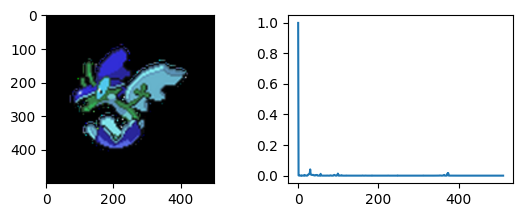

In [72]:
# menampilkan salah satu gambar dan histogramnya

file =  'pokemon-dataset-1000/val/flapple/flapple_11.png'
image = cv2.imread(file)
image = cv2.resize(image, fixed_size)
fv_histogram  = fd_histogram(image)
plt.subplot(221),plt.imshow(image)
plt.subplot(222),plt.plot(fv_histogram)


**Program utama untuk membaca semua image pada training dataset dan mengekstraksi fitur hu moments, haralick fitur dan histogram colour dari masing masing image**


1. membaca daftar sub folder pada path dimana dataset training berada : train_path       = "dataset1/train"
2. jika di perhatikan di dalam folder train ada beberapa folder dan 1 file

In [73]:
train_labels = os.listdir(train_path)
print(train_labels)
# sort the training labels
train_labels.sort()
print(train_labels)

# empty lists to hold feature vectors and labels
global_features = []
labels          = []

['phantump', 'corsola', 'sizzlipede', 'thundurus-incarnate', 'glameow', 'electabuzz', 'trevenant', 'hakamo-o', 'arbok', 'impidimp', 'cosmoem', 'magby', 'blacephalon', 'kyogre', 'primeape', 'hitmonlee', 'abra', 'bisharp', 'crobat', 'latias', 'charjabug', 'golbat', 'snorunt', 'croconaw', 'tranquill', 'pidove', 'simisear', 'stoutland', 'mienfoo', 'rayquaza', 'feebas', 'gurdurr', 'swadloon', 'eldegoss', 'tapu-lele', 'weezing', 'rattata', 'metang', 'bouffalant', 'forretress', 'finneon', 'skwovet', 'wooloo', 'pangoro', 'starmie', 'oshawott', 'mudkip', 'meloetta-aria', 'spearow', 'shuppet', 'azelf', 'banette', 'octillery', 'regice', 'escavalier', 'blipbug', 'dwebble', 'psyduck', 'regirock', 'comfey', 'surskit', 'yanma', 'drampa', 'scizor', 'ferroseed', 'magikarp', 'pidgeot', 'glalie', 'barboach', 'kricketune', 'hattrem', 'doublade', 'frogadier', 'croagunk', 'crabominable', 'hitmontop', 'dragapult', 'flapple', 'polteageist', 'cofagrigus', 'dreepy', 'persian', 'dusclops', 'thwackey', 'staraptor

output yang diharapkan :


```
['buttercup', 'coltsfoot', 'bluebell', 'desktop.ini']
['bluebell', 'buttercup', 'coltsfoot', 'desktop.ini']
```



3. Kode program untuk perulangan sebanyak train_labels (jumlah sub folder pada train_path
4. pastikan yang di dalam folder train adalah folder - bukan file
5. ulangi untuk semua image dalam setiap folder sampai dengan maksimal sebanyak variabel image_perclass
6. untuk setiap image - ubah ukuran menjadi ukuran standard dengan perintah resize
7. ekstrak fitur haralic, hu dan histogram dari setiap image
8. gabungkan semua fitur global menjadi 1 lalu simpan variabel global_feature
9. untuk setiap perulangan selesai - simpan variabel global_features ke dalam array global_features sebagai baris baru dengan perintah append

In [92]:
for training_name in train_labels:
  dir = os.path.join(train_path, training_name)
  if os.path.isdir(dir):
    print(dir)
    print(" adalah folder")
    current_label = training_name
    for x in range(1,images_per_class+1):
          # get the image file name
          file = dir + "/" + training_name + "_" + str(x) + ".png" #Change the file name format

          # read the image and resize it to a fixed-size
          image = cv2.imread(file)

          #Check if image was loaded properly
          if image is not None:
              image = cv2.resize(image, fixed_size)

              ####################################
              # Global Feature extraction
              ####################################
              fv_hu_moments = fd_hu_moments(image)
              fv_haralick   = fd_haralick(image)
              fv_histogram  = fd_histogram(image)

              ###################################
              # Concatenate global features
              ###################################
              global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

              # update the list of labels and feature vectors
              labels.append(current_label)
              global_features.append(global_feature)
    print("[STATUS] processed folder: {}".format(current_label)) #Corrected indentation

pokemon-dataset-1000/val/abomasnow
 adalah folder
[STATUS] processed folder: abomasnow
pokemon-dataset-1000/val/abra
 adalah folder
[STATUS] processed folder: abra
pokemon-dataset-1000/val/absol
 adalah folder
[STATUS] processed folder: absol
pokemon-dataset-1000/val/accelgor
 adalah folder
[STATUS] processed folder: accelgor
pokemon-dataset-1000/val/aegislash-shield
 adalah folder
[STATUS] processed folder: aegislash-shield
pokemon-dataset-1000/val/aerodactyl
 adalah folder
[STATUS] processed folder: aerodactyl
pokemon-dataset-1000/val/aggron
 adalah folder
[STATUS] processed folder: aggron
pokemon-dataset-1000/val/aipom
 adalah folder
[STATUS] processed folder: aipom
pokemon-dataset-1000/val/alakazam
 adalah folder
[STATUS] processed folder: alakazam
pokemon-dataset-1000/val/alcremie
 adalah folder
[STATUS] processed folder: alcremie
pokemon-dataset-1000/val/alomomola
 adalah folder
[STATUS] processed folder: alomomola
pokemon-dataset-1000/val/altaria
 adalah folder
[STATUS] processe

output yang diharapkan :



```
dataset1/train/bluebell
 adalah folder
[STATUS] processed folder: bluebell
dataset1/train/buttercup
 adalah folder
[STATUS] processed folder: buttercup
dataset1/train/coltsfoot
 adalah folder
[STATUS] processed folder: coltsfoot
```



**End Loop Training untuk seluruh sub folder **


tampilkan ukuran vektor global features

tampilkan array training labels

In [93]:
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))



[STATUS] feature vector size (454, 532)
[STATUS] training Labels (454,)


[STATUS] feature vector size (240, 532)
[STATUS] training Labels (240,)

Encoding target label

In [94]:
# encode the target labels
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")



[STATUS] training labels encoded...


output di harapkan

[STATUS] training labels encoded...

Standarisasi nilai vektor menjadi 0 sampai dengan 1 untuk semua data

In [95]:
# scale features in the range (0-1)
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))



[STATUS] feature vector normalized...
[STATUS] target labels: [  0   0   0   0   0   1   2   3   4   5   6   7   8   9  10  11  12  13
  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  64  65  66  67  68  69  70  71  72  73  74  

outout di harapkan :



```
[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[STATUS] target labels shape: (240,)
```



simpan semua data ke lam file h5 dan disimpan dalam folder yang telah diset pada bagian awal program ini

In [97]:
# save the feature vector using HDF5
h5f_data = h5py.File(h5_data, 'w')
h5f_data.create_dataset('pokemon-dataset-1000', data=np.array(rescaled_features))

h5f_label = h5py.File(h5_labels, 'w')
h5f_label.create_dataset('pokemon-dataset-1000', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of Feature Extraction..")


[STATUS] end of Feature Extraction..


Output di harapkan :

[STATUS] end of Feature Extraction..

# **Kode Program Lanjutan di bawah ini adalah untuk melakukan training dan Testing terhadap fitur yang sudah di ekstraks untuk beberapa algoritma klasifikasi **

Import tambahan library yang diperlukan

In [122]:

import glob
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import joblib
warnings.filterwarnings('ignore')

Mengeset variabel yang dapat ditune
jika lanjutan ini di file terpisah dapat di tambahkan :


```
# This is formatted as code
train_path = "dataset/train"
h5_data    = 'output/data.h5'
h5_labels  = 'output/labels.h5'
```



In [123]:
# tunable-parameters
#--------------------
num_trees = 100
test_size = 0.10
seed      = 9
scoring    = "accuracy"
test_path  = "dataset_pokemon/dataset_pokemon/test"


Menambahkan folder test jika belum ada

In [124]:
if not os.path.exists(test_path):
    os.makedirs(test_path)

Menginisialisasi model klasifier


In [125]:
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))
models.append(('ANN', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)))

# variables to hold the results and names
results = []
names   = []
print (models)

[('LR', LogisticRegression(random_state=9)), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier(random_state=9)), ('RF', RandomForestClassifier(random_state=9)), ('NB', GaussianNB()), ('SVM', SVC(random_state=9)), ('ANN', MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs'))]


Output yang diharapkan :

```
# This is formatted as code

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)),
                            ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('CART', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')), ('RF', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)), ('NB', GaussianNB(priors=None, var_smoothing=1e-09)), ('SVM', SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=9, shrinking=True, tol=0.001,
    verbose=False))]
```



```
# This is formatted as code
```



Membaca file h5 dimana hasil ekstraki fitur disimpan
ini tidak perlu jika program lanjutan ini tidak menjadi file terpisah


In [126]:
h5f_data  = h5py.File(h5_data, 'r')
h5f_label = h5py.File(h5_labels, 'r')

print(h5f_data)
print(h5f_label)

<HDF5 file "data.h5" (mode r)>
<HDF5 file "labels.h5" (mode r)>


output diharapkan :



```
<HDF5 file "data.h5" (mode r)>
<HDF5 file "labels.h5" (mode r)>
```



menyimpan fitur

In [127]:
global_features_string = h5f_data['pokemon-dataset-1000']
global_labels_string   = h5f_label['pokemon-dataset-1000']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

print(global_features)
print(global_labels_string)



[[8.25420110e-01 4.59216040e-02 2.44240313e-02 ... 4.58689378e-18
  2.87321948e-01 4.99414410e-18]
 [8.51757378e-01 6.25624055e-02 3.09651548e-02 ... 4.58689375e-18
  2.87321950e-01 4.99414410e-18]
 [8.25420110e-01 4.59216040e-02 2.44240313e-02 ... 4.58689378e-18
  2.87321948e-01 4.99414410e-18]
 ...
 [9.76094909e-01 3.05446317e-02 2.20879165e-02 ... 4.58705877e-18
  2.88331501e-01 4.99493579e-18]
 [0.00000000e+00 2.49808814e-02 1.18322126e-02 ... 2.34721712e-17
  3.17521074e-01 0.00000000e+00]
 [9.33769414e-01 1.37749233e-02 3.64242608e-03 ... 1.24061058e-17
  6.38822185e-01 1.79423465e-17]]
<HDF5 dataset "pokemon-dataset-1000": shape (454,), type "<i8">


output diharapkan :


```
[[1.02277289e-02 6.41539399e-02 3.80293751e-01 ... 8.69740569e-01
  6.21634972e-02 8.80157045e-01]
 [2.70794117e-05 2.24351000e-02 1.26657213e-02 ... 8.69741443e-01
  6.21926975e-02 8.80154788e-01]
 [0.00000000e+00 3.14553867e-02 1.64679193e-02 ... 8.69741419e-01
  6.21939464e-02 8.80158524e-01]
 ...
 [6.83042966e-03 1.17875410e-02 1.00131224e-02 ... 8.69668780e-01
  5.76707307e-02 8.80238908e-01]
 [1.42973036e-02 3.31645389e-02 2.45463253e-02 ... 8.69637236e-01
  6.18151726e-02 8.80100514e-01]
 [1.60889028e-03 9.45723423e-04 3.74527032e-03 ... 8.69873367e-01
  6.80346632e-02 8.80016124e-01]]
<HDF5 dataset "dataset_1": shape (720,), type "<i8">
```



Menutup file h5
ini tidak perlu di eksekusi jika tadi tidak di buka

In [128]:
h5f_data.close()
h5f_label.close()

menampilkan ukuran fitur dan label dari hasil ekstraksi fitur global images

In [129]:
# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

[STATUS] features shape: (454, 532)
[STATUS] labels shape: (454,)


melakukan pembagian dataset menjadi train dan testing dataset

In [130]:
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (408, 532)
Test data   : (46, 532)
Train labels: (408,)
Test labels : (46,)


output yang diharapkan :

[STATUS] splitted train and test data...

Train data  : (216, 532)

Test data   : (24, 532)

Train labels: (216,)

Test labels : (24,)

Melatih model dan menghitung akurasi dari masing masing model yang berbeda klasiifier

In [131]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.820793 (0.052485)
LDA: 0.232744 (0.051718)
KNN: 0.120183 (0.041739)
CART: 0.955732 (0.037840)
RF: 0.955732 (0.037840)
NB: 0.950854 (0.034845)
SVM: 0.467866 (0.076006)
ANN: 0.017073 (0.024512)


output yang diharapkan :



```
LR: 0.883550 (0.053308)
LDA: 0.480952 (0.102552)
KNN: 0.800000 (0.095534)
CART: 0.847186 (0.042528)
RF: 0.934848 (0.037270)
NB: 0.786147 (0.127983)
SVM: 0.879004 (0.044374)
ANN: 0.794805 (0.103271)
```



Plot akurasi dan deviasi dalam box plot diagram



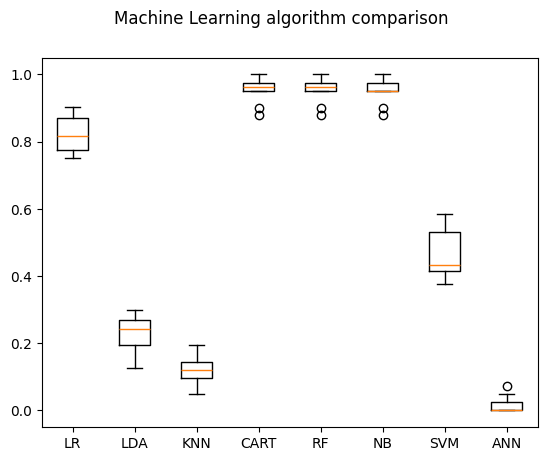

In [132]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


output yang diharapkan  adalah blok plot